In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

Mesavina normalnih raspodela (eng. mixture of Gaussians) predstavlja nesto
sofisticiraniji model klasterovanja od modela k sredina, ali je zanimljivo primetiti
da postoji i veza, koja ce biti objasnjena na kraju. Osnovna pretpostavka je
da se podaci mogu podeliti u odredeni broj relativno kompaktnih globularnih
klastera ciji se oblik moze dobro opisati normalnim raspodelama sa razlicitim
prosecima i matricama kovarijacije. Proseci, jasno, definisu pozicije klastera u
prostoru, dok matrice kovarijacije opisuju njihov oblik i orijentaciju u prostoru.
Povrsi jednake gustine u okviru jednog klastera u tom slucaju predstavljaju
elipsoide. U ovom modelu, raspodela je malo slozenija nego u dosadasnjim,
ali ima prirodnu dekompoziciju na jednostavnije raspodele.

In [19]:
n_samples = 300
np.random.seed(0)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

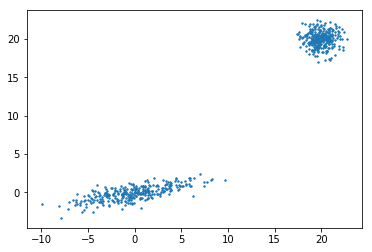

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=2)

In [7]:
mog = GaussianMixture(n_components=2).fit(X_train)

In [8]:
labels = mog.predict(X_train)

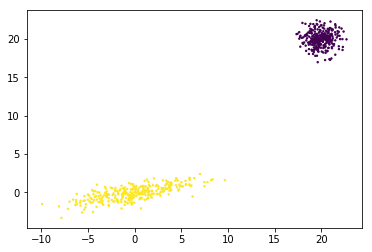

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=2)

Usled probabilisticke prirodne ovog modela, moguce je dobiti ocenu verovatnoce pripadnosti instance klasteru.

In [14]:
preds = mog.predict_proba(X_train)
preds.shape

(600, 2)

Prikazujemo ocenu verovatnoce za pripadnost klasterima za podskup instanci.

In [18]:
preds[30:40, :]

array([[1.00000000e+000, 5.34638100e-135],
       [1.00000000e+000, 9.92997982e-114],
       [1.00000000e+000, 2.41180265e-132],
       [1.00000000e+000, 1.47661115e-150],
       [1.00000000e+000, 3.26058237e-142],
       [1.00000000e+000, 2.03075710e-139],
       [1.00000000e+000, 7.07379091e-117],
       [1.00000000e+000, 2.66696921e-127],
       [1.00000000e+000, 6.88320116e-132],
       [1.00000000e+000, 6.40448457e-141]])